In [32]:
import random
import pandas as pd
from tqdm import tqdm

In [33]:
file_path = "destilbert/kaggle_training_data.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=['love'])
df = df[(df[['sadness', 'joy', 'anger', 'fear', 'surprise']] != 0).any(axis=1)]
df.head()

,text,label,sadness,joy,anger,fear,surprise,label_name
0,i feel awful about it too because it s my job ...,0,1,0,0,0,0,sadness
1,im alone i feel awful,0,1,0,0,0,0,sadness
2,ive probably mentioned this before but i reall...,1,0,1,0,0,0,joy
3,i was feeling a little low few days back,0,1,0,0,0,0,sadness
4,i am one of those people who feels like going ...,1,0,1,0,0,0,joy


In [34]:
def create_multilabel_dataset(df, num_samples=1000):
    new_data = []
    
    # Define probabilities for different label counts
    label_probabilities = {1: 0.5, 2: 0.3, 3: 0.15, 4: 0.04, 5: 0.01}
    
    for _ in tqdm(range(num_samples)):
        # Determine the number of labels for this sample based on probability
        num_labels = random.choices(list(label_probabilities.keys()), weights=label_probabilities.values())[0]
        
        # Randomly select rows from the dataset
        selected_rows = df.sample(n=num_labels)
        
        # Combine text data
        combined_text = ". ".join(selected_rows["text"])
        
        # Create label vector
        label_vector = {emotion: int(selected_rows[emotion].sum() > 0) for emotion in df.columns[2:-1]}
        
        # Append to new dataset
        new_data.append({"text": combined_text, **label_vector})
    
    # Create new dataframe
    new_df = pd.DataFrame(new_data)
    
    return new_df

# Generate the new dataset
multilabel_df = create_multilabel_dataset(df, num_samples=20000)

100%|██████████| 20000/20000 [02:01<00:00, 164.15it/s]


In [48]:
emos = ['sadness', 'joy', 'anger', 'fear', 'surprise']

<Axes: >

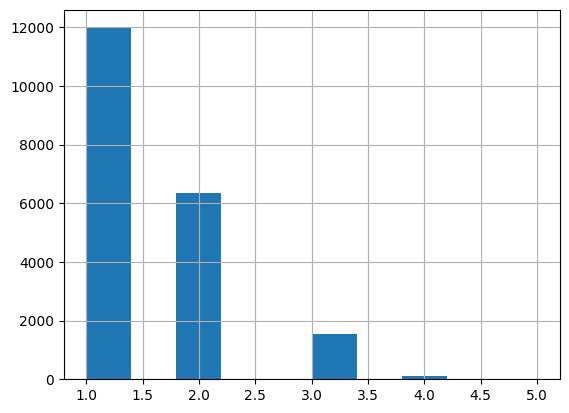

In [36]:
multilabel_df[emos].sum(axis=1).hist()

In [59]:
df_translated = pd.read_csv("df_translated.csv")
df_translated = df_translated[df_translated['comment'] == 'original_eng']

In [61]:
df_translated

,id,text,Anger,Fear,Joy,Sadness,Surprise,comment
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0,original_eng
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0,original_eng
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0,original_eng
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1,original_eng
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0,original_eng
...,...,...,...,...,...,...,...,...
2763,eng_train_track_a_02764,"""Yeah, but did you just find that?",0,1,0,0,1,original_eng
2764,eng_train_track_a_02765,I did as little as possible with my right hand...,0,0,0,0,0,original_eng
2765,eng_train_track_a_02766,"Okay that sucks, right?",1,0,0,1,0,original_eng
2766,eng_train_track_a_02767,"The spark leaped through his body into mine, a...",0,1,0,0,1,original_eng


In [62]:
df_translated.drop(columns=["id"], inplace=True)

In [64]:
multilabel_df.rename(columns={emotion: emotion.capitalize() for emotion in emos}, inplace=True)
multilabel_df['comment'] = 'twitter'
multilabel_df.columns

Index(['text', 'Sadness', 'Joy', 'Anger', 'Fear', 'Surprise', 'comment'], dtype='object')

In [65]:
df_translated

,text,Anger,Fear,Joy,Sadness,Surprise,comment
0,But not very happy.,0,0,1,1,0,original_eng
1,Well she's not gon na last the whole song like...,0,0,1,0,0,original_eng
2,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0,original_eng
3,"Yes, the Oklahoma city bombing.",1,1,0,1,1,original_eng
4,They were dancing to Bolero.,0,0,1,0,0,original_eng
...,...,...,...,...,...,...,...
2763,"""Yeah, but did you just find that?",0,1,0,0,1,original_eng
2764,I did as little as possible with my right hand...,0,0,0,0,0,original_eng
2765,"Okay that sucks, right?",1,0,0,1,0,original_eng
2766,"The spark leaped through his body into mine, a...",0,1,0,0,1,original_eng


In [67]:
data = pd.concat([df_translated, multilabel_df])

In [68]:
data.to_csv("eng_with_twitter.csv", index=False)